In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from scipy.spatial.distance import pdist, squareform

color_mapping12 = {
    "C>A": "deepskyblue",
    "G>T": "deepskyblue",
    "C>G": "black",
    "G>C": "black",
    "C>T": "red",
    "G>A": "red",
    "T>A": "silver",
    "A>T": "silver",
    "T>C": "yellowgreen",
    "A>G": "yellowgreen",
    "T>G": "pink",
    "A>C": "pink",
}

In [2]:
spectra = pd.read_csv('./data/viral_spectra_dataset.csv').sort_values(['Type', 'G>T'])
linages = pd.read_csv('./data/vir_linages.csv')
linages['taxid'] = linages['taxid'].astype(str)

spectra = spectra.merge(linages[['taxid', 'family', 'order']], 'left')

spectra.loc[spectra.taxname.str.len() > 25, 'taxname'] = \
    spectra.loc[spectra.taxname.str.len() > 25, 'virusname']

spectra_long = spectra.melt(
    ['taxname', 'Type', 'virusname', 'df', 'taxid'],
    list(color_mapping12.keys()),
    var_name='Mut', value_name='MutSpec')
print(len(spectra_long))
spectra_long['label'] = spectra_long.taxname.str[:25] + ' (' + spectra_long.Type + ')'
spectra_long

420


,taxname,Type,virusname,df,taxid,Mut,MutSpec,label
0,Hepacivirus hominis,+,HCV,nemu,3052230,C>A,0.012574,Hepacivirus hominis (+)
1,Enterovirus D,+,evD,nemu,138951,C>A,0.010681,Enterovirus D (+)
2,Dengue virus,+,denv,nemu,12637,C>A,0.025002,Dengue virus (+)
3,Enterovirus A,+,evA,nemu,138948,C>A,0.011674,Enterovirus A (+)
4,FMDV,+,FMDV,nemu,12110,C>A,0.014670,FMDV (+)
...,...,...,...,...,...,...,...,...
415,Piscine orthoreovirus,ds,PRV,nemu,1157337,A>C,0.027282,Piscine orthoreovirus (ds)
416,Mammalian orthoreovirus,ds,MRV,nemu,351073,A>C,0.025958,Mammalian orthoreovirus (ds)
417,Avian orthoreovirus,ds,aorv,nemu,38170,A>C,0.044178,Avian orthoreovirus (ds)
418,Banna virus,ds,BAV,nemu,77763,A>C,0.018818,Banna virus (ds)


In [3]:
spectra_long.label.unique()

array(['Hepacivirus hominis (+)', 'Enterovirus D (+)', 'Dengue virus (+)',
       'Enterovirus A (+)', 'FMDV (+)', 'Deformed wing virus (+)',
       'Norwalk virus (+)', 'Enterovirus C (+)', 'Hepatovirus A (+)',
       'Orthohepevirus A (+)', 'Citrus tristeza virus (+)',
       'West Nile virus (+)', 'GB virus C (+)', 'PRRSV (+)',
       'Avian coronavirus (+)', 'Alphacoronavirus 1 (+)', 'PEDV (+)',
       'SARS-CoV-2 22C (+)', 'SARS-CoV-2 20A (+)', 'SBV (-)',
       'Human metapneumovirus (-)', 'Akabane orthobunyavirus (-)',
       'Puumala orthohantavirus (-)', 'RSV-A (-)',
       'Influenza A virus (-)', 'Oropouche orthobunyavirus (-)',
       'European bat 1 lyssavirus (-)', 'Rice stripe tenuivirus (-)',
       'EHDV (ds)', 'Hepatitis B virus (ds)',
       'Piscine orthoreovirus (ds)', 'Mammalian orthoreovirus (ds)',
       'Avian orthoreovirus (ds)', 'Banna virus (ds)', 'RBSDV (ds)'],
      dtype=object)

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
spectra_long.label.nunique()

35

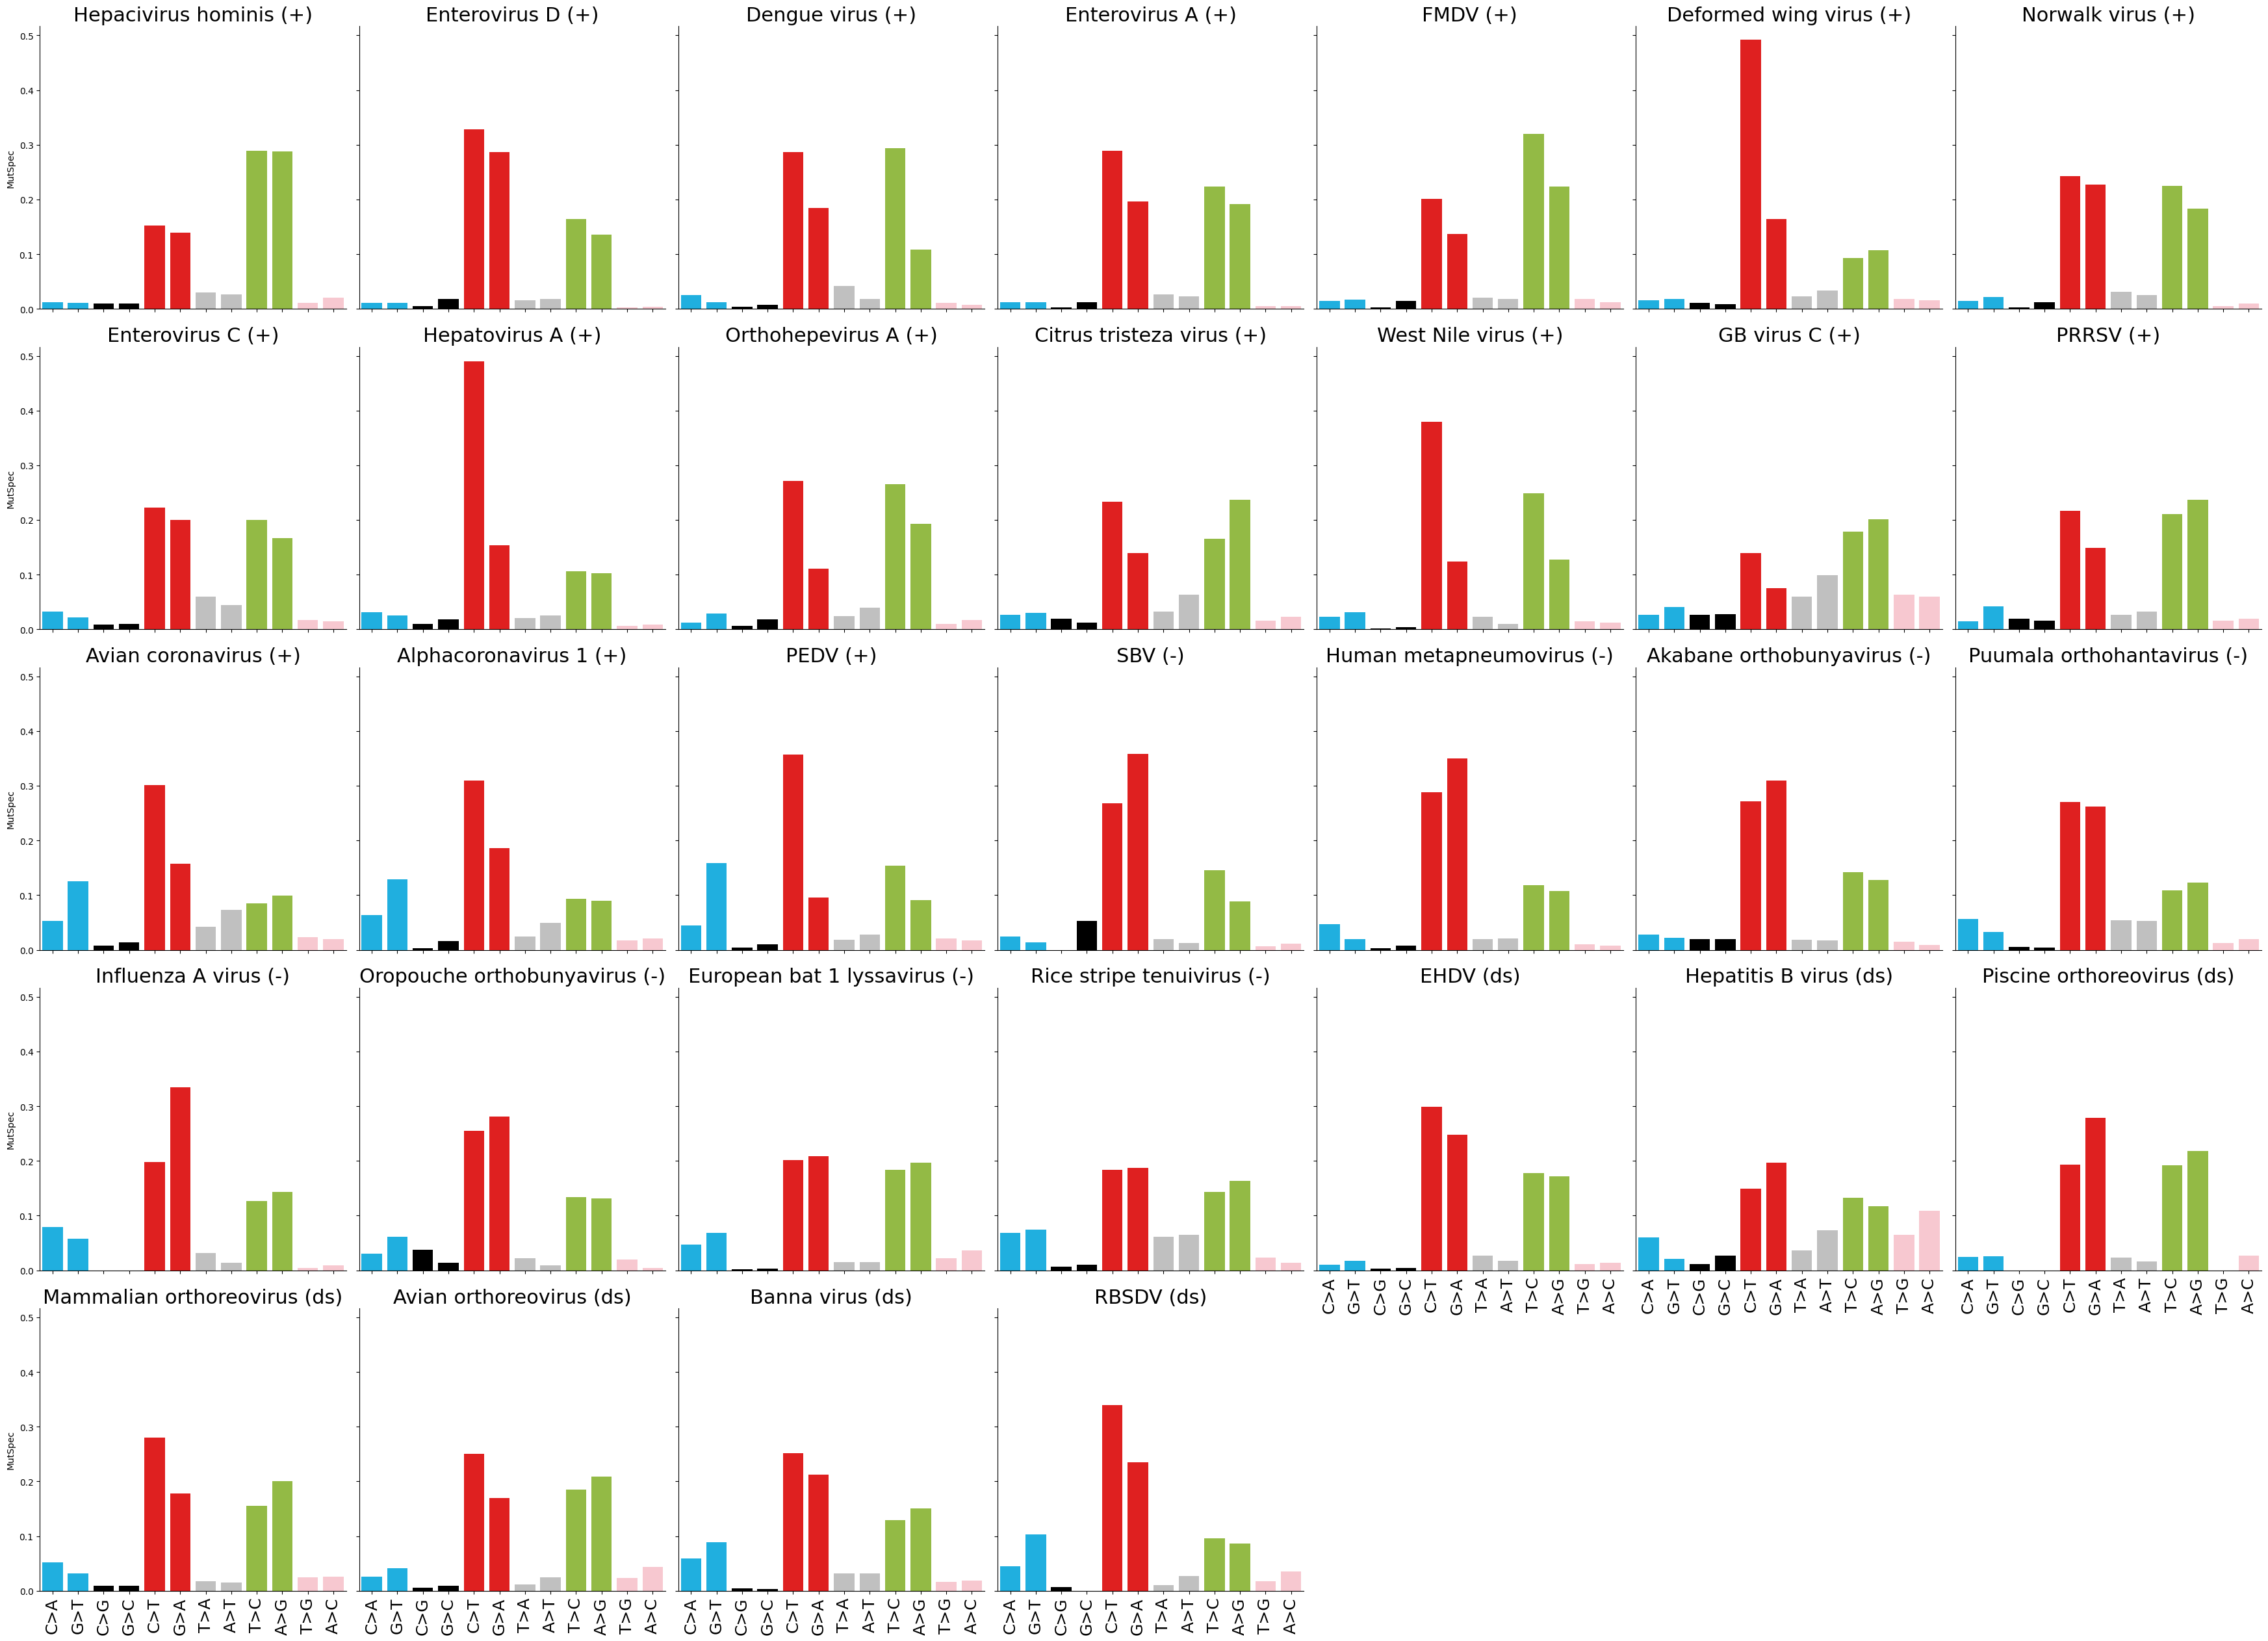

In [17]:
g = sns.catplot(
    spectra_long[spectra_long['df'] == 'nemu'], 
    x='Mut', y='MutSpec', col='label', 
    col_wrap=7, palette=color_mapping12, kind='bar', 
    order=color_mapping12.keys(), sharey=True)
g.set_titles('{col_name}')
g.set_xlabels('')
for ax in g.axes:
    ax.set_title(ax.get_title(), fontsize=22)
    ax.set_xticklabels(color_mapping12.keys(), fontsize=18, rotation=90)
g.savefig('./figures/spectra_dataset_barplots.pdf')

In [18]:
for tax in spectra.dropna(subset='family').family.unique():
    ms = spectra[spectra.family == tax].iloc[:, :12]
    if len(ms) > 1:
        cossim = 1-pdist(ms, 'cosine')
        cossim_mean = cossim.mean()
        print(f"{tax}:\t{cossim_mean:.3f}\t{(cossim).round(2)}")
    else:
        print(tax)


Picornaviridae__12058:	0.940	[0.97 0.84 0.95 0.95 0.99 0.94]
Flaviviridae__11050:	0.967	[0.97]
Iflaviridae__699189
Caliciviridae__11974
Hepeviridae__291484
Closteroviridae__69973
Arteriviridae__76803
Coronaviridae__11118:	0.972	[0.99 0.96 0.96]
Pneumoviridae__11244
Peribunyaviridae__1980416
Orthomyxoviridae__11308
Rhabdoviridae__11270
Reoviridae__10880:	0.950	[0.96 0.98 0.97 0.97 0.94 0.95 0.96 0.94 0.86 0.99 0.97 0.93 0.96 0.9
 0.97]


Picornaviridae__12058:	0.060	[0.97 0.84 0.95 0.95 0.99 0.94]
Flaviviridae__11050:	0.033	[0.97]
Coronaviridae__11118:	0.028	[0.99 0.96 0.96]
Reoviridae__10880:	0.050	[0.96 0.98 0.97 0.97 0.94 0.95 0.96 0.94 0.86 0.99 0.97 0.93 0.96 0.9
 0.97]


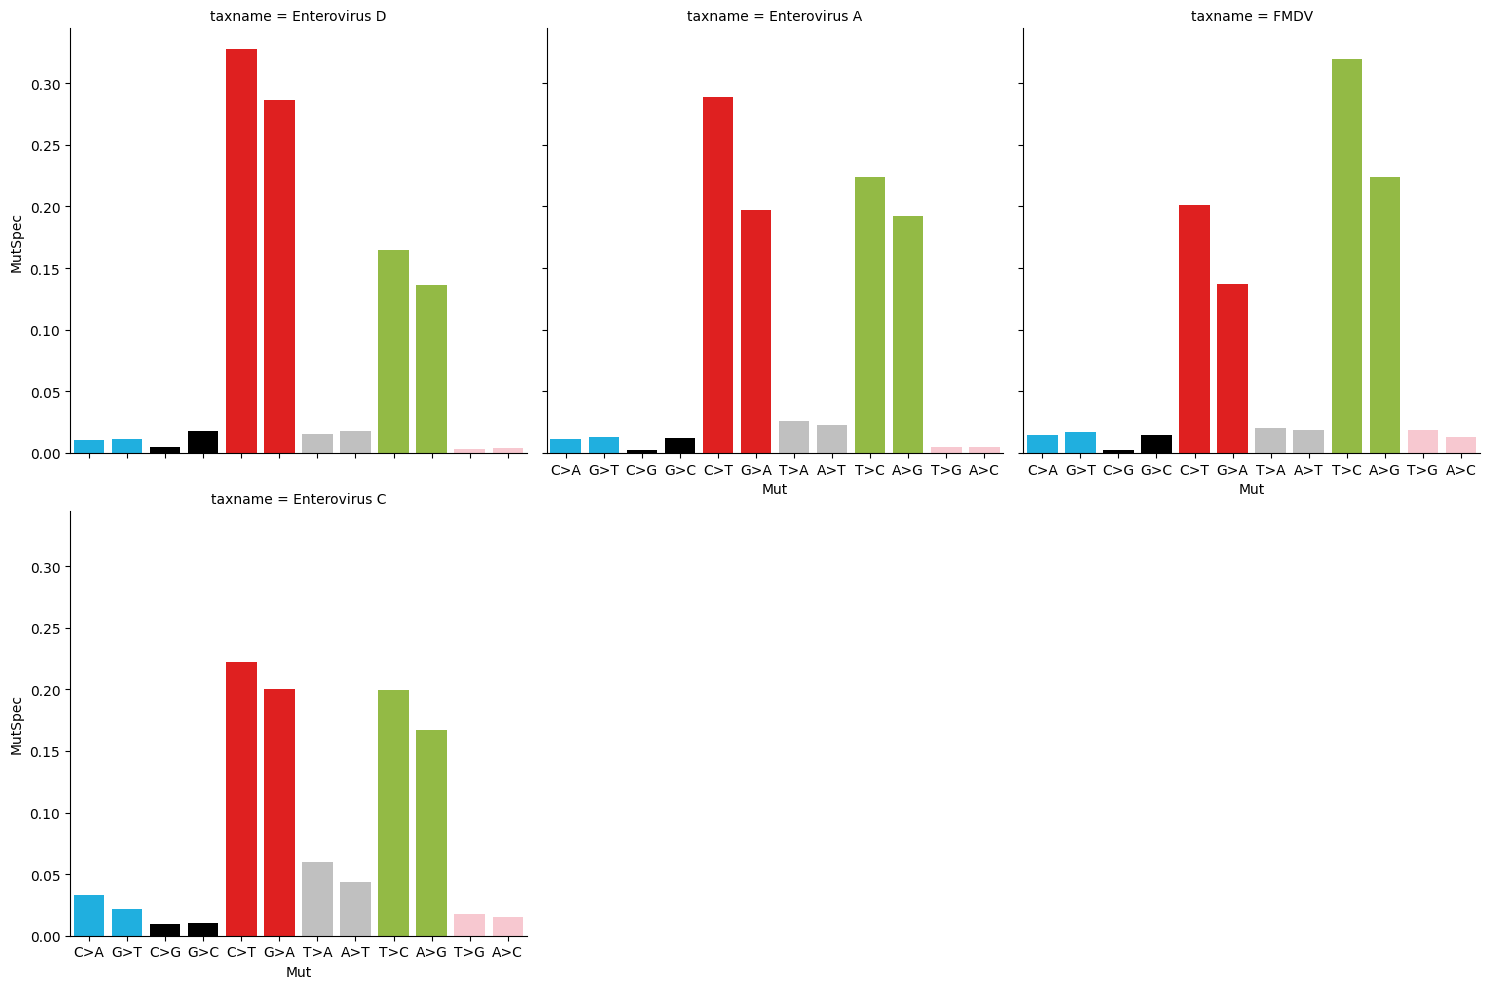

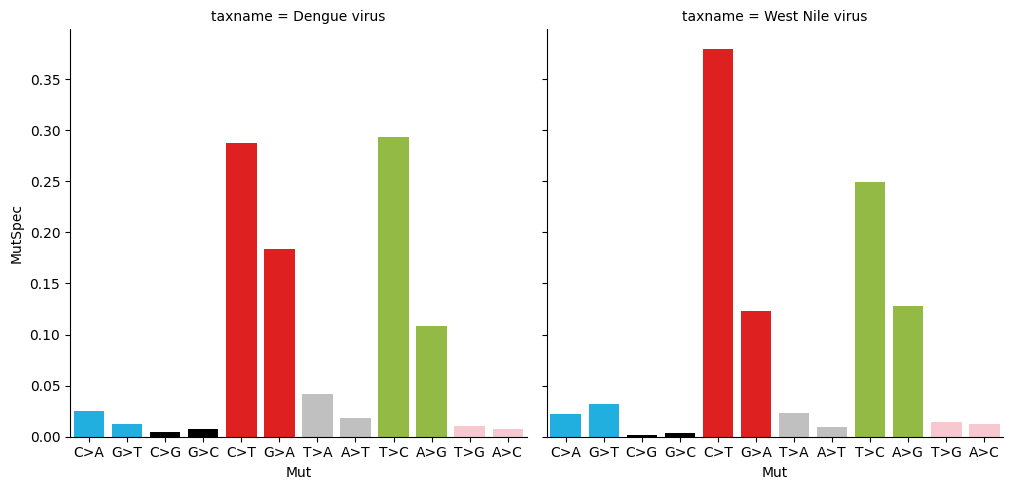

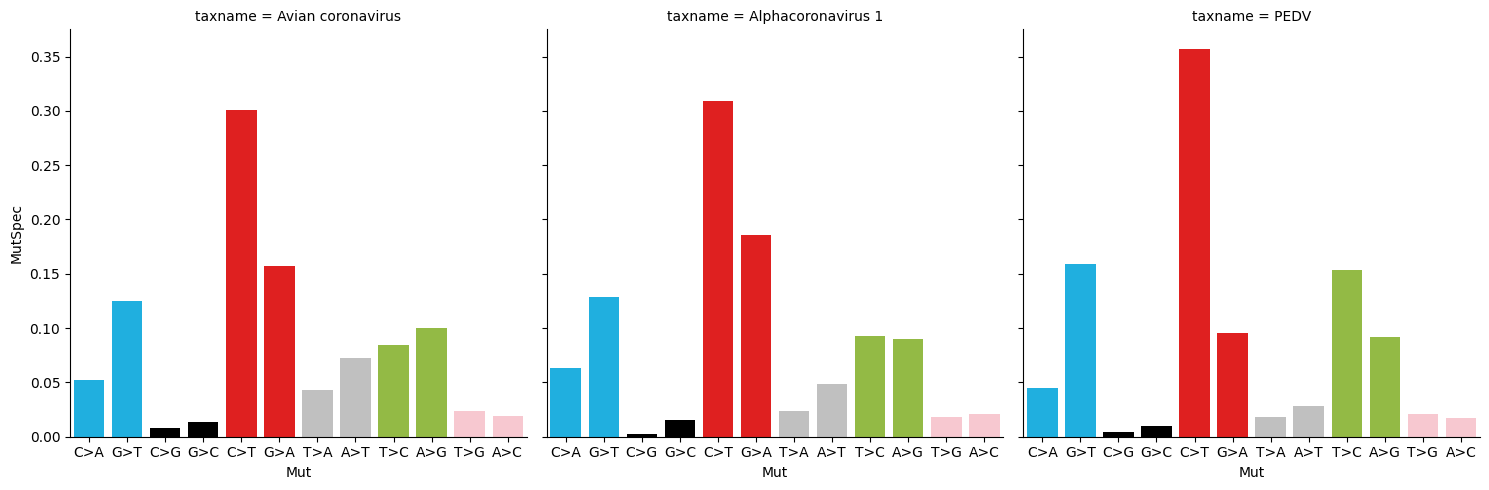

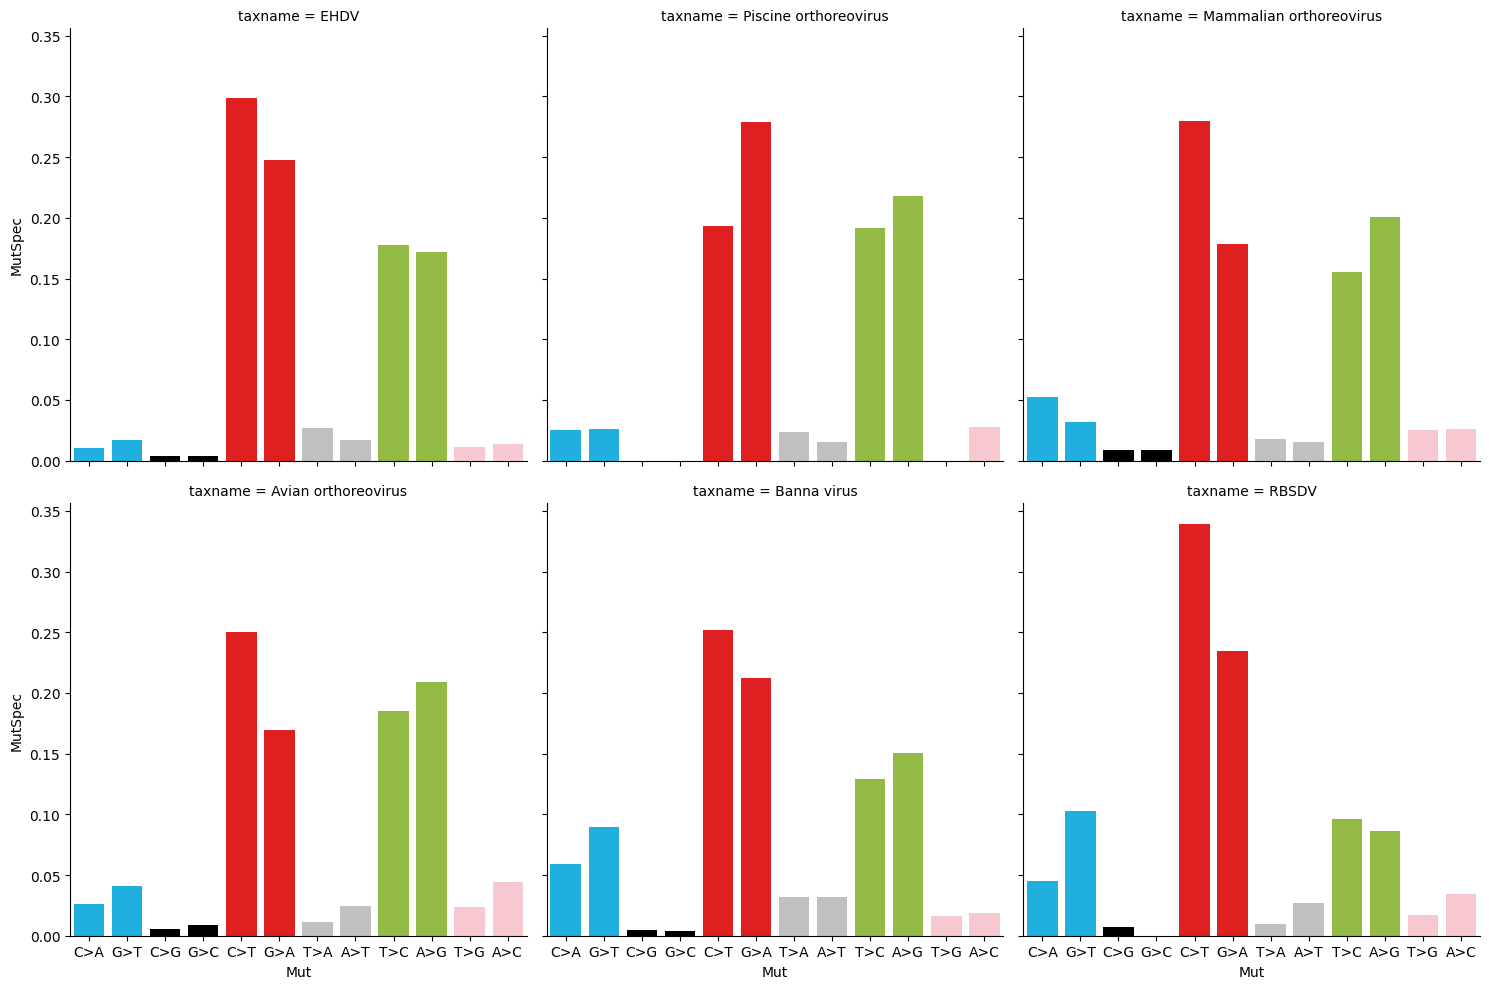

In [19]:
for tax in spectra.dropna(subset='family').family.unique():
    ms = spectra[spectra.family == tax].set_index('taxname').iloc[:, :12]
    if len(ms) > 1:
        cossim = pdist(ms, 'cosine')
        cossim_mean = cossim.mean()
        print(f"{tax}:\t{cossim_mean:.3f}\t{(1-cossim).round(2)}")
        sns.catplot(
            ms.melt(var_name='Mut', value_name='MutSpec', ignore_index=False).reset_index(), 
            x='Mut', y='MutSpec', col='taxname', 
            col_wrap=3, palette=color_mapping12, kind='bar', 
            order=color_mapping12.keys(), sharey=True)


In [6]:
from utils import get_equilibrium_freqs

In [5]:
spectra = pd.read_csv('./data/viral_spectra_dataset.csv')

In [ ]:
# eq_freqs_cdn, eq_freqc_aa = get_equilibrium_freqs(spectrum_20A, 'rate', gc=1)
# eq_freqs_cdn.to_csv('./data/20A/cdn_eq_freqs.csv', index=False, float_format='%g')
# eq_freqs_cdn

In [34]:
eq_freq = []

for i in range(len(spectra)):
    ms12 = spectra.iloc[i, :12].reset_index()
    ms12.columns = ['Mut', 'rate']

    virusname = spectra.iloc[i]['virusname']
    taxname = spectra.iloc[i]['taxname']
    sense = spectra.iloc[i]['Type']

    eq_freqs_cdn, eq_freqc_aa = get_equilibrium_freqs(ms12, 'rate', gc=1)
    

    eq_freq.append(eq_freqc_aa.assign(virusname=virusname, taxname=taxname, sense=sense))

eq_freq_df = pd.concat(eq_freq, ignore_index=True)
eq_freq_df['sense'] = eq_freq_df['sense'].map({
    '+': '+ssRNA',
    '-': '-ssRNA',
    'ds': 'dsRNA',
})
eq_freq_df.loc[eq_freq_df['virusname'].isin(
    ['CoV20A', 'CoV22C', 'PEDV', 'alCoV1', 'ACoV ']), 'sense'] = \
    ['+ssRNA (Cov)']*5*20
eq_freq_df

,aa,eq_freq,virusname,taxname,sense
0,Arg,0.122635,HCV,Hepacivirus hominis,+ssRNA
1,Pro,0.095629,HCV,Hepacivirus hominis,+ssRNA
2,Ser,0.095571,HCV,Hepacivirus hominis,+ssRNA
3,Ala,0.093153,HCV,Hepacivirus hominis,+ssRNA
4,Gly,0.090677,HCV,Hepacivirus hominis,+ssRNA
...,...,...,...,...,...
695,Lys,0.013792,RBSDV,RBSDV,dsRNA
696,Gly,0.012196,RBSDV,RBSDV,dsRNA
697,Met,0.011718,RBSDV,RBSDV,dsRNA
698,Glu,0.007543,RBSDV,RBSDV,dsRNA


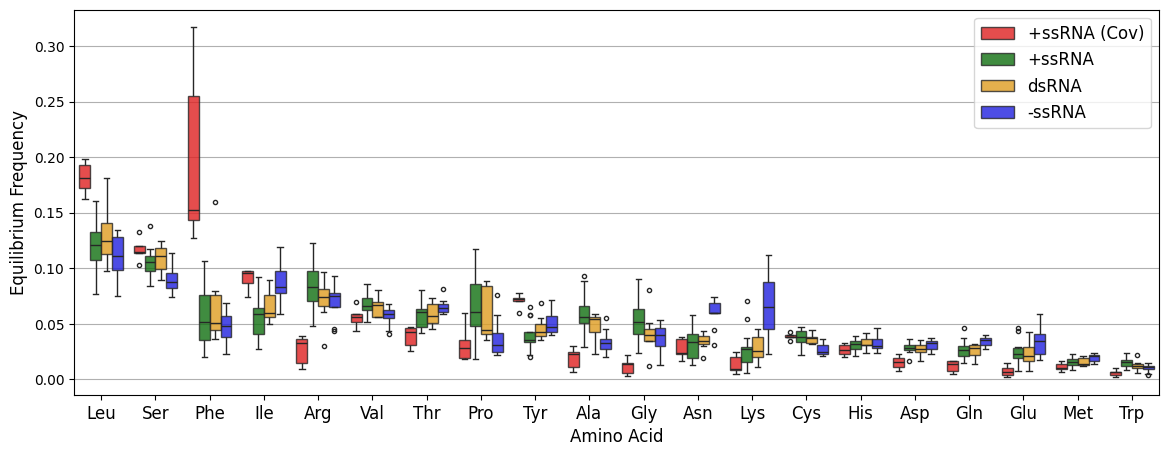

In [56]:
plt.figure(figsize=(14, 5))
ax=sns.boxplot(eq_freq_df, x='aa', y='eq_freq', hue='sense', 
               hue_order=['+ssRNA (Cov)', '+ssRNA', 'dsRNA', '-ssRNA'], 
               fliersize=3,
               order=eq_freq_df.groupby(['aa'])['eq_freq'].mean().sort_values(ascending=False).index, 
               palette=['red', 'green', 'orange', 'blue', ], 
               boxprops=dict(alpha=.8),
)
plt.grid(axis='y')
ax.set_axisbelow(True)
plt.xticks(fontsize=12)
plt.ylabel('Equilibrium Frequency', fontsize=12)
plt.xlabel('Amino Acid', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.savefig('./figures/eq_freq_viral_groups_boxplot.pdf')

In [51]:
from itertools import combinations
for _, gr in eq_freq_df.groupby('aa'):
    for (sense1, sense2) in combinations(gr.sense.unique(), 2):
        data1 = gr[gr.sense == sense1].eq_freq
        data2 = gr[gr.sense == sense2].eq_freq
        from scipy.stats import mannwhitneyu
        stat, pvalue = mannwhitneyu(data1, data2, alternative='two-sided')
        p_adj = pvalue * 6  # Bonferroni correction for 6 comparisons
        if p_adj < 0.05:
            print(f"{gr.aa.values[0]}:\t{sense1} vs {sense2}:\t p-value={p_adj:.3e}")

Ala:	+ssRNA vs +ssRNA (Cov):	 p-value=2.064e-03
Ala:	+ssRNA vs -ssRNA:	 p-value=2.492e-02
Arg:	+ssRNA vs +ssRNA (Cov):	 p-value=1.032e-03
Arg:	+ssRNA (Cov) vs -ssRNA:	 p-value=5.994e-03
Asn:	+ssRNA vs -ssRNA:	 p-value=5.654e-03
Asn:	+ssRNA (Cov) vs -ssRNA:	 p-value=2.398e-02
Asn:	-ssRNA vs dsRNA:	 p-value=1.993e-02
Asp:	+ssRNA vs +ssRNA (Cov):	 p-value=4.128e-03
Asp:	+ssRNA (Cov) vs -ssRNA:	 p-value=1.199e-02
Cys:	+ssRNA vs -ssRNA:	 p-value=3.036e-02
Cys:	+ssRNA (Cov) vs -ssRNA:	 p-value=1.199e-02
Cys:	-ssRNA vs dsRNA:	 p-value=3.147e-02
Gln:	+ssRNA vs +ssRNA (Cov):	 p-value=4.128e-03
Gln:	+ssRNA (Cov) vs -ssRNA:	 p-value=5.994e-03
Glu:	+ssRNA vs +ssRNA (Cov):	 p-value=4.128e-03
Glu:	+ssRNA (Cov) vs -ssRNA:	 p-value=5.994e-03
Gly:	+ssRNA vs +ssRNA (Cov):	 p-value=1.032e-03
Ile:	+ssRNA vs +ssRNA (Cov):	 p-value=1.961e-02
Ile:	+ssRNA vs -ssRNA:	 p-value=3.684e-02
Leu:	+ssRNA vs +ssRNA (Cov):	 p-value=1.032e-03
Leu:	+ssRNA (Cov) vs -ssRNA:	 p-value=5.994e-03
Lys:	+ssRNA vs -ssRNA:	 p-valu